In [1]:
import  matplotlib.pyplot as plt
import numpy as np
from scipy.fft import fft, fftfreq
import os
import shutil
import scipy as sp
import sys
from matplotlib import gridspec
from matplotlib import rc
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.colors import SymLogNorm
from matplotlib.colors import LogNorm
import h5py

from openpmd_viewer import OpenPMDTimeSeries
from openpmd_viewer.addons import LpaDiagnostics

FontSize=25
FontSizeLabelAxis=25
rc('legend',fontsize=FontSize)
rc('xtick',labelsize=FontSize)
rc('ytick',labelsize=FontSize)
font = {'family' : 'normal',
        'size'   : FontSize}

rc('font', **font)
rc('text', usetex=True)

# scaling factors
mm=1e3
MV=1e-6
kV=1e-3

cms = sp.constants.speed_of_light


In [5]:
h5file = '/lstr/sahara/aard/cphillips/5nC/1beam/3warpx/nostruct/17408_1ncsqua/diags/slabmovingwarpx/openpmd_000000.h5'
f = h5py.File(h5file,'r')
print(f.keys())
dat = f['data']
ts = dat['0']
parts = ts['particles']
myp = parts['myparticle']
print(myp.keys())

fie = ts['fields']

print(fie.keys())

<KeysViewHDF5 ['data']>
<KeysViewHDF5 ['charge', 'id', 'mass', 'momentum', 'position', 'positionOffset', 'weighting']>
<KeysViewHDF5 ['B', 'E', 'divE', 'j', 'rho']>


In [6]:
h5file = '/lstr/sahara/aard/cphillips/1nC/2beam/3warpx/rect/distWXin-b2.h5'
f = h5py.File(h5file,'r')
print(f.keys())
dat = f['data']
print(dat.keys())
ts = dat['0']
print(ts.keys())
parts = ts['particles']
myp = parts['myparticle']
print(myp.keys())
pos = myp['position']
xs = pos['z']
print(np.mean(xs)-10)

h5file = '/lstr/sahara/aard/cphillips/1nC/2beam/3warpx/rect/distWXin-b1.h5'
f = h5py.File(h5file,'r')
print(f.keys())
dat = f['data']
print(dat.keys())
ts = dat['0']
print(ts.keys())
parts = ts['particles']
myp = parts['myparticle']
print(myp.keys())
pos = myp['position']
xs = pos['z']
print(np.mean(xs))

<KeysViewHDF5 ['data']>
<KeysViewHDF5 ['0']>
<KeysViewHDF5 ['fields', 'particles']>
<KeysViewHDF5 ['charge', 'mass', 'momentum', 'position', 'positionOffset', 'weighting']>
-16.51224983573807
<KeysViewHDF5 ['data']>
<KeysViewHDF5 ['0']>
<KeysViewHDF5 ['fields', 'particles']>
<KeysViewHDF5 ['charge', 'mass', 'momentum', 'position', 'positionOffset', 'weighting']>
7.26056252157529e-16


<KeysViewHDF5 ['Step#0', 'Step#1', 'Step#10', 'Step#11', 'Step#12', 'Step#13', 'Step#14', 'Step#15', 'Step#16', 'Step#17', 'Step#18', 'Step#2', 'Step#3', 'Step#4', 'Step#5', 'Step#6', 'Step#7', 'Step#8', 'Step#9']>


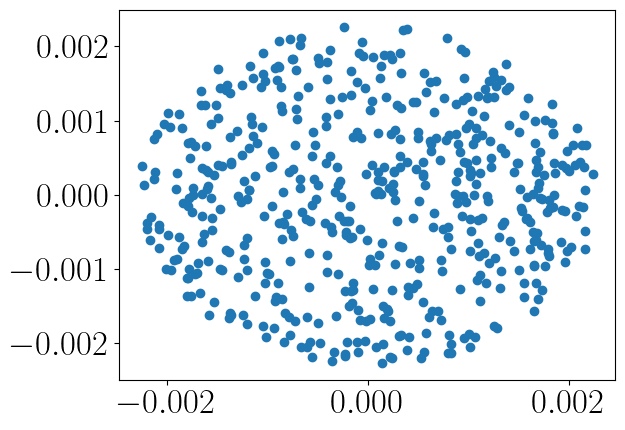

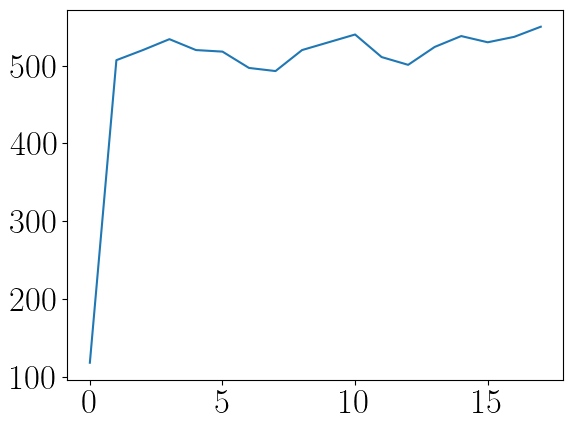

In [14]:
h5file = '/lstr/sahara/aard/cphillips/1nC/2beam/1cath2y4/centeredsqua/drive/1p5lambda/input.h5'

ts = np.arange(18)

xs = []
ys = []
zs = []
numparts = []

f = h5py.File(h5file,'r')
print(f.keys())
for i in ts:
    dat = f['Step#'+str(i)]
#print(dat.keys())
    xs.append(dat['x'][:])
    ys.append(dat['y'][:])
    zs.append(dat['z'][:])
    numparts.append(len(dat['z'][:]))

plt.scatter(xs[3],ys[3])
plt.show()

plt.plot(numparts)
plt.show()

In [ ]:
num_parts = [118,

In [33]:
st0 = f['Step#0']
st1 = f['Step#1']
stf = f['Step#420']

print(st0.keys())
print(st1.keys())
print(stf.keys())
zs = stf['z'][:]/cms
xs = stf['x'][:]

ts0 = oth['Step#0']
print(ts0.keys())
x0 = ts0['x'][:]
oz = ts0['z'][:]
ts = ts0['time'][:]

print(zs[:10])
print(oz[:20])
print(ts[:10])
print(zs[0]/ts[0])

<KeysViewHDF5 ['id', 'porigin', 'ptype', 'px', 'py', 'pz', 'q', 'x', 'y', 'z']>
<KeysViewHDF5 ['id', 'porigin', 'ptype', 'px', 'py', 'pz', 'q', 'x', 'y', 'z']>
<KeysViewHDF5 ['id', 'porigin', 'ptype', 'px', 'py', 'pz', 'q', 'x', 'y', 'z']>
<KeysViewHDF5 ['id', 'm', 'px', 'py', 'pz', 'q', 'time', 'x', 'y', 'z']>
[-3.29112262e-12 -3.50757506e-12 -2.52350941e-12 -3.52012679e-12
 -2.66697446e-12 -2.92689906e-12 -2.79326799e-12 -3.21604680e-12
 -2.52149335e-12 -2.45839379e-12]
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  2.16840434e-19  0.00000000e+00
  0.00000000e+00  0.00000000e+00  2.16840434e-19 -2.16840434e-19
  0.00000000e+00  0.00000000e+00 -2.16840434e-19  0.00000000e+00]
[3.86356515e-08 3.86358677e-08 3.86348850e-08 3.86358803e-08
 3.86350283e-08 3.86352879e-08 3.86351544e-08 3.86355766e-08
 3.86348831e-08 3.86348200e-08]
-8.51835672491264e-05


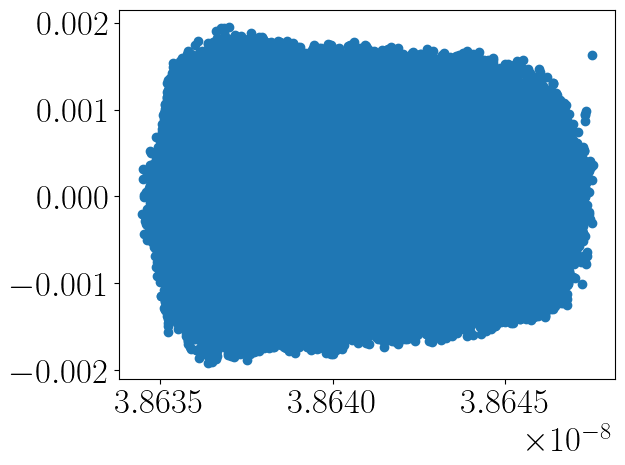

In [34]:
plt.scatter(ts,x0)
plt.scatter(-zs,xs)

<KeysViewHDF5 ['Step#0']>
<KeysViewHDF5 ['id', 'm', 'px', 'py', 'pz', 'q', 'time', 'x', 'y', 'z']>
[-1.41014555e-03  1.97852277e-03 -1.99308794e-03 ...  1.60395843e-03
  2.72402715e-04  2.66763699e-05]
[1.21422825e-08 1.21423105e-08 1.21423547e-08 ... 1.21587674e-08
 1.21587386e-08 1.21637894e-08]


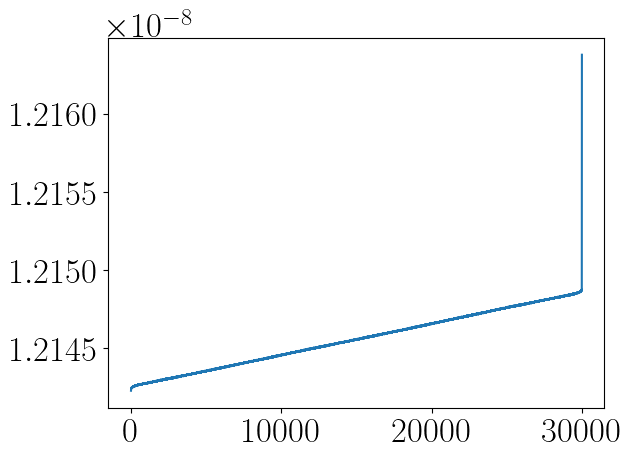

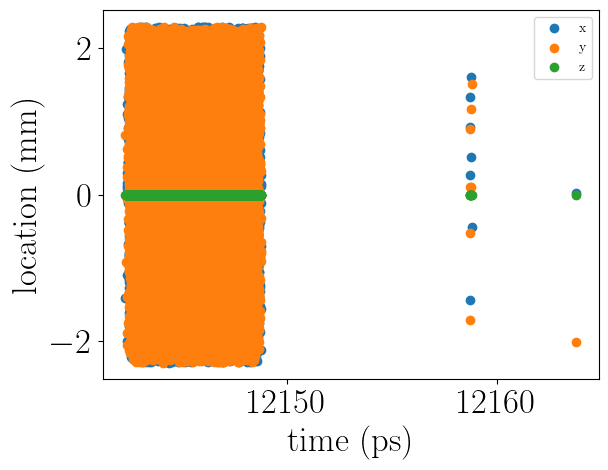

In [16]:
h5file = '/lstr/sahara/aard/cphillips/5nC/1beam/1cath2y4/metistry2/0493E3077B534387/PHOTOCATHODE.h5'
h5file = '/lstr/sahara/aard/cphillips/1nC/2beam/1cath2y4/centeredsqua/drive/1p5lambda/PHOTOCATHODE.h5'
f = h5py.File(h5file,'r')
print(f.keys())
step = f['Step#0']
print(step.keys())
time = step['time'][:]
xs = step['x'][:]
ys = step['y'][:]
zs = step['z'][:]

print(xs)
print(time)

plt.figure()
plt.plot(time)
plt.show()

plt.figure()
plt.scatter(time*1e12,xs*1e3,label='x')
plt.scatter(time*1e12,ys*1e3,label='y')
plt.scatter(time*1e12,zs*1e3,label='z')
plt.legend(fontsize=10)
plt.xlabel('time (ps)')
plt.ylabel('location (mm)')
plt.show()

In [6]:
import numpy as np

conval = 50
weight = 100
soft = 10
na = 4

def constrain(x):
    return (weight*(1-np.exp(-((x-conval)/soft)**na)))

print(constrain(50))
print(constrain(45))
print(constrain(40))
print(constrain(30))

0.0
6.058693718652419
63.212055882855765
99.99998874648253
